# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [26]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = 'C:/Users/user/Documents/Python Scripts/AIMarathon'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [5]:
#先把年齡days to years
app_train['Ages']=np.round(app_train['DAYS_BIRTH']/365)
app_train['Ages'].head(5)

0    26.0
1    46.0
2    52.0
3    52.0
4    55.0
Name: Ages, dtype: float64

In [6]:
#先看最大值和最小值
Max=app_train['Ages'].max()
Min=app_train['Ages'].min()
print('the max of Ages is : %i' % Max)
print('the min of Ages is : %i' % Min)

the max of Ages is : 69
the min of Ages is : 21


In [7]:
#資料離散化(等頻)
subdf=app_train[['TARGET','Ages']]
subdf['Ages_cut']=pd.cut(subdf['Ages'],10).astype(str)
subdf['Ages_cut'].value_counts()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(35.4, 40.2]      43297
(40.2, 45.0]      40585
(30.6, 35.4]      39473
(25.8, 30.6]      34656
(49.8, 54.6]      34466
(54.6, 59.4]      33573
(59.4, 64.2]      28259
(45.0, 49.8]      28228
(20.952, 25.8]    14213
(64.2, 69.0]      10761
Name: Ages_cut, dtype: int64

In [8]:
#計算個數
final=subdf.groupby(['Ages_cut','TARGET']).count()
final

Ages
Ages_cut       TARGET       
(20.952, 25.8] 0       12492
               1        1721
(25.8, 30.6]   0       30784
               1        3872
(30.6, 35.4]   0       35492
               1        3981
(35.4, 40.2]   0       39469
               1        3828
(40.2, 45.0]   0       37444
               1        3141
(45.0, 49.8]   0       26108
               1        2120
(49.8, 54.6]   0       32116
               1        2350
(54.6, 59.4]   0       31694
               1        1879
(59.4, 64.2]   0       26770
               1        1489
(64.2, 69.0]   0       10317
               1         444

In [28]:
index=final.index.levels[0]
x=np.arange(len(index))
b1=final[final.index.labels[1]==0]['Ages'].values
b2=final[final.index.labels[1]==1]['Ages'].values
#final['Ages'].values

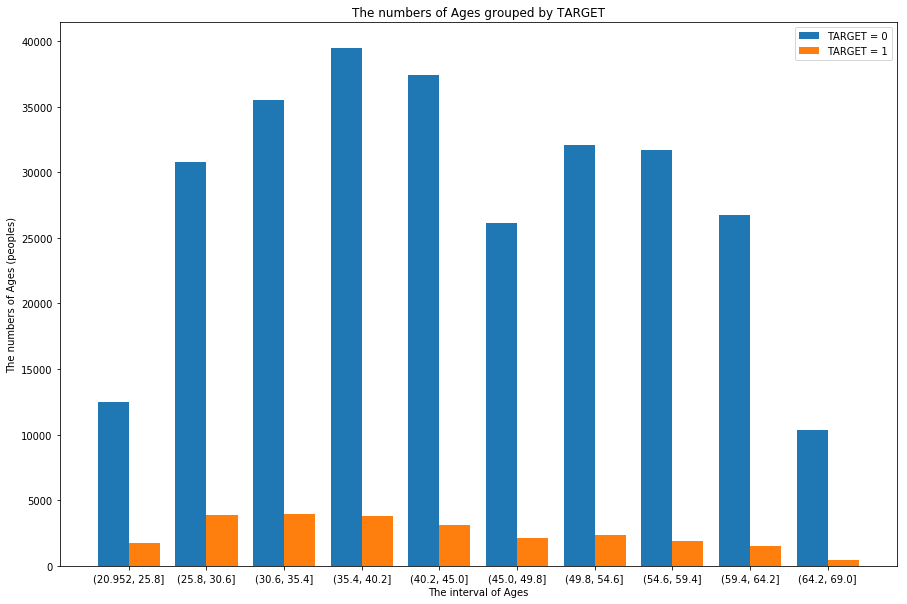

In [43]:
plt.figure(figsize = (15, 10))
plt.bar(x,b1,label='TARGET = 0',width=0.4)
plt.bar(x+0.4,b2,label='TARGET = 1',width=0.4)

plt.xticks(x+0.2,index)

plt.xlabel('The interval of Ages')
plt.ylabel('The numbers of Ages (peoples)')
plt.title('The numbers of Ages grouped by TARGET')
plt.legend(loc='best')
